# Okavango_Scenario

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import matplotlib.patches as patches
from matplotlib.dates import date2num
import matplotlib.dates as mdates
from hydroeval import evaluator, nse, rmse, pbias
from pyemu.pst.pst_utils import SFMT,IFMT,FFMT

flopy is installed in C:\Users\seonggyu.park\Miniconda3\envs\sm_pest\lib\site-packages\flopy


# Set Path

In [2]:
wd_scn = "D:/Projects/Watersheds/Okavango/scenarios/okvg_swatmf_scn_bau_new"
wd_base = "D:/Projects/Watersheds/Okavango/scenarios/okvg_swatmf_calibrated_base_new"
wd_rd = "D:/Projects/Watersheds/Okavango/scenarios/okvg_swatmf_scn_rd_new"
# os.chdir(wd)



# Create Dataframe from output.rch

## BAU

In [27]:
ress = [48]
scn_137 = pd.read_csv(
                    os.path.join(wd_scn, "output.rsv"),
                    delim_whitespace=True,
                    skiprows=9,
                    usecols=[1, 2, 5], # streamflow
                    # usecols=[1, 2, 10], # sediment
                    names=["res_no", "filter", "scn_137"],
                    index_col=0)
scn_137 = scn_137.loc[48]
scn_137 = scn_137[scn_137["filter"] < 13]
scn_137.index = pd.date_range('1/1/2003', periods=len(scn_137.scn_137), freq="M")


# scn_137 = pd.read_csv(
#                     os.path.join(wd_scn, "output.rch"),
#                     delim_whitespace=True,
#                     skiprows=9,
#                     usecols=[1, 3, 6], # streamflow
#                     # usecols=[1, 2, 10], # sediment
#                     names=["res_no", "filter", "scn_137"],
#                     index_col=0)
# scn_137 = scn_137.loc[137]
# scn_137 = scn_137[scn_137["filter"] < 13]
# scn_137.index = pd.date_range('1/1/2003', periods=len(scn_137.scn_137), freq="M")



scn_240 = pd.read_csv(
                    os.path.join(wd_scn, "output.rch"),
                    delim_whitespace=True,
                    skiprows=9,
                    usecols=[1, 3, 6], # streamflow
                    # usecols=[1, 3, 10], # streamflow
                    names=["date", "filter", "scn_240"],
                    index_col=0)
scn_240 = scn_240.loc[240]
scn_240 = scn_240[scn_240["filter"] < 13]
scn_240.index = pd.date_range('1/1/2003', periods=len(scn_240.scn_240), freq="M")


In [28]:
scn_df = pd.concat([scn_137, scn_240], axis=1)
scn_dff = scn_df.groupby(scn_df.index.month).mean()
scn_df_aa = scn_df.resample('A').mean()
scn_df_as = scn_df.resample('A').sum() * 86400
scn_dff = scn_dff.drop('filter', axis=1)
scn_dff

,scn_137,scn_240
1,93.331176,276.805882
2,124.494118,352.823529
3,242.988235,370.682353
4,301.358824,404.311765
5,97.044706,332.882353
6,62.538765,212.900000
7,61.592309,182.470588
8,61.405882,156.482353
9,61.405882,126.890000
10,61.405882,119.234706


## BASE

In [29]:
# Select subs
subs = [137, 240]

# Create data with parameter change
df_rch = pd.read_csv(
                    os.path.join(wd_base, "output.rch"),
                    delim_whitespace=True,
                    skiprows=9,
                    usecols=[1, 3, 6], # streamflow
                    # usecols=[1, 3, 10], # sed
                    names=["date", "filter", "streamflow_sim"],
                    index_col=0)
df_adj = pd.DataFrame()
for i in subs:
    df = df_rch.loc[i]
    df = df[df["filter"] < 13]
    df.index = pd.date_range('1/1/2003', periods=len(df.streamflow_sim), freq="M")
    df.rename(columns = {'streamflow_sim':'base_{}'.format(i)}, inplace = True)
    # df = df.drop('filter', axis=1)
    df_adj = pd.concat(
        [df_adj, df['base_{}'.format(i)]], axis=1,
        sort=False
        )
df_adj.index = pd.DatetimeIndex(df_adj.index).normalize()



In [30]:
df_adj

,base_137,base_240
2003-01-31,194.400,342.90
2003-02-28,462.800,474.00
2003-03-31,344.000,499.30
2003-04-30,366.500,428.20
2003-05-31,125.300,416.50
...,...,...
2019-08-31,3.869,112.10
2019-09-30,2.669,88.16
2019-10-31,2.791,73.11
2019-11-30,5.841,102.60


In [31]:
base_df = df_adj.groupby(df_adj.index.month).mean()
base_df.index
base_df

,base_137,base_240
1,227.977059,287.429412
2,340.776471,433.352941
3,415.852941,474.958824
4,347.800000,472.135294
5,95.222353,356.500000
6,15.187176,219.470588
7,7.767471,170.976471
8,5.482529,146.070588
9,3.580118,125.305882
10,3.662529,119.374118


# RD

In [32]:
# Select subs
subs = [137, 240]

# Create data with parameter change
df_rch = pd.read_csv(
                    os.path.join(wd_rd, "output.rch"),
                    delim_whitespace=True,
                    skiprows=9,
                    usecols=[1, 3, 6], # streamflow
                    # usecols=[1, 3, 10], # sed
                    names=["date", "filter", "streamflow_sim"],
                    index_col=0)
df_rd = pd.DataFrame()
for i in subs:
    df = df_rch.loc[i]
    df = df[df['filter'] < 13]
    df.index = pd.date_range('1/1/2003', periods=len(df.streamflow_sim), freq="M")
    
    df.rename(columns = {'streamflow_sim':'base_{}'.format(i)}, inplace = True)
    df_rd = pd.concat(
        [df_rd, df['base_{}'.format(i)]], axis=1,
        sort=False
        )
df_rd.index = pd.DatetimeIndex(df_rd.index).normalize()
rd_df = df_rd
df_rd = df_rd.groupby(df_rd.index.month).mean()
df_rd



,base_137,base_240
1,232.952941,284.276471
2,345.317647,432.047059
3,421.088235,473.941176
4,348.623529,470.794118
5,92.531765,351.564706
6,14.565412,212.958824
7,7.775647,166.111765
8,5.443824,142.870588
9,3.424353,121.765294
10,3.564529,114.398235


# Average Monthly Streamflow

In [34]:
from matplotlib.ticker import FuncFormatter
from swatmf_pkgs.swatmf_viz import y_fmt

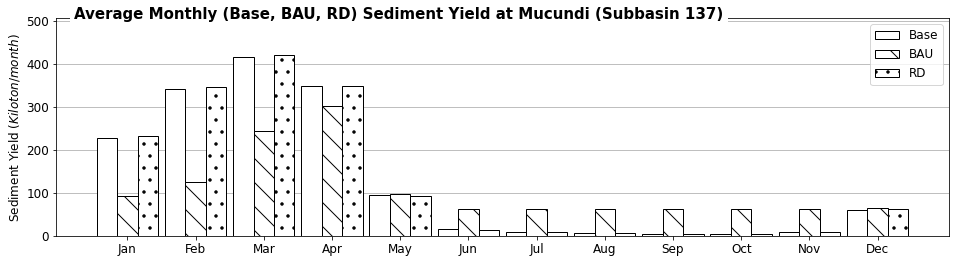

In [35]:
fig, ax = plt.subplots( 
                # sharex=True,
                figsize=(16,4)
                )
# x = date2num(base_df.index)
w = 0.3
ax.bar(base_df.index-0.3, base_df.base_137, width=w, align='center', label='Base', hatch='', color='white', edgecolor='black', zorder=3)
ax.bar(base_df.index, scn_dff.scn_137, width=w, align='center', label='BAU', hatch='\\', color='white', edgecolor='black', zorder=3)
ax.bar(base_df.index+0.3, df_rd.base_137, width=w, align='center', label='RD', hatch='.', color='white', edgecolor='black', zorder=3)

# for index, value in zip(base_df.index-0.2, base_df.base_137):
#     ax.text(
#         index-0.1, value+10000, '{:3.0f}'.format(value/1000),
#         fontsize=12, rotation=0, horizontalalignment='center')
# for index, value in zip(base_df.index, scn_dff.scn_137):
#     ax.text(index, value+10000, '{:3.0f}'.format(value/1000), fontsize=12, rotation=0, horizontalalignment='center')
# for index, value in zip(base_df.index, df_rd.base_137):
#     ax.text(index+0.3, value+10000, '{:3.0f}'.format(value/1000), fontsize=12, rotation=0, horizontalalignment='center')
ax.yaxis.set_major_formatter(FuncFormatter(y_fmt))
ax.tick_params(axis='both', labelsize=12)
# plt.setp(ax.get_xticklabels(), rotation=70)
# ax.set_xticks(base_df.index[::1])
# ax.xaxis_date()
# plt.xticks[1].set_visible(False)
ax.set_xticks(base_df.index[::1])
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticklabels(month_names)
ax.margins(y=0.2)
ax.set_title(
    # 'Average Monthly (Base, BAU, RD) Streamflow at Mucundi (Subbasin 137)', # streamflow
    'Average Monthly (Base, BAU, RD) Sediment Yield at Mucundi (Subbasin 137)', #sed
    fontsize=15,
    fontweight="bold",
    horizontalalignment='left',
    x=0.02,
    y=0.97,
    bbox=dict(
        facecolor='white',
        edgecolor='white'))
# ax.autoscale(tight=True)
# plt.tight_layout()
ax.legend(fontsize=12)
ax.grid(axis='y', zorder=0)
ax.set_ylabel(r'Sediment Yield $(Kiloton/month)$', fontsize = 12)
# plt.savefig('am_mucundi_ff_sed.png', dpi=300, bbox_inches="tight")
plt.show()

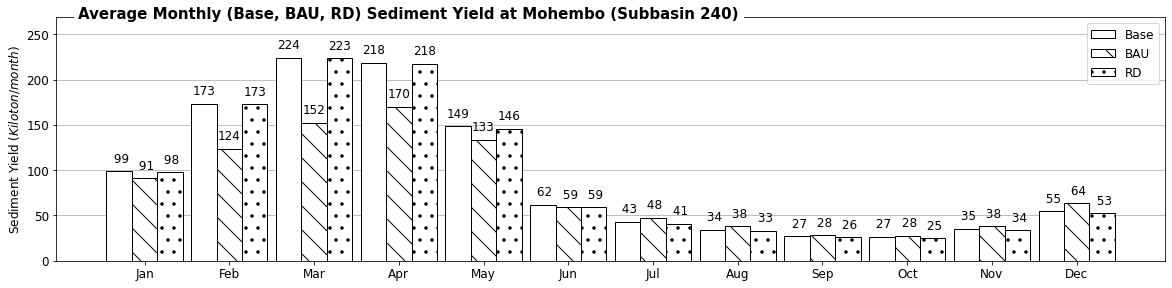

In [20]:
fig, ax = plt.subplots( 
                # sharex=True,
                figsize=(16,4)
                )
# x = date2num(base_df.index)
w = 0.3
ax.bar(base_df.index-0.3, base_df.base_240, width=w, align='center', label='Base', hatch='', color='white', edgecolor='black', zorder=3)
ax.bar(base_df.index, scn_dff.scn_240, width=w, align='center', label='BAU', hatch='\\', color='white', edgecolor='black', zorder=3)
ax.bar(base_df.index+0.3, df_rd.base_240, width=w, align='center', label='RD', hatch='.', color='white', edgecolor='black', zorder=3)

for index, value in zip(base_df.index-0.2, base_df.base_240):
    ax.text(
        index-0.1, value+10000, '{:3.0f}'.format(value/1000),
        fontsize=12, rotation=0, horizontalalignment='center')
for index, value in zip(base_df.index, scn_dff.scn_240):
    ax.text(index, value+10000, '{:3.0f}'.format(value/1000), fontsize=12, rotation=0, horizontalalignment='center')
for index, value in zip(base_df.index, df_rd.base_240):
    ax.text(index+0.3, value+10000, '{:3.0f}'.format(value/1000), fontsize=12, rotation=0, horizontalalignment='center')

ax.yaxis.set_major_formatter(FuncFormatter(y_fmt))

ax.tick_params(axis='both', labelsize=12)
# plt.setp(ax.get_xticklabels(), rotation=70)
# ax.set_xticks(base_df.index[::1])
# ax.xaxis_date()
# plt.xticks[1].set_visible(False)
ax.set_xticks(base_df.index[::1])
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticklabels(month_names)


ax.margins(y=0.2)
ax.set_title(
    'Average Monthly (Base, BAU, RD) Sediment Yield at Mohembo (Subbasin 240)',
    fontsize=15,
    fontweight="bold",
    horizontalalignment='left',
    x=0.02,
    y=0.97,
    bbox=dict(
        facecolor='white',
        edgecolor='white'))
# ax.autoscale(tight=True)
plt.tight_layout()
ax.legend(fontsize=12)
ax.grid(axis='y', zorder=0)
# ax.set_ylabel(r'Stream Discharge $[m^3/s]$', fontsize = 12)
ax.set_ylabel(r'Sediment Yield $(Kiloton/month)$', fontsize = 12)
plt.savefig('am_mohembo_ff_sed.png', dpi=300, bbox_inches="tight")
plt.show()

# Average Annual Stream/Sediment

In [36]:
scn_dff = scn_df.groupby(scn_df.index.month).mean()
scn_df_aa = scn_df.resample('A').mean()
scn_df_as = scn_df.resample('A').sum() * 86400

In [37]:
bau_df = pd.concat([scn_137, scn_240], axis=1)
bau_df = bau_df.drop('filter', axis=1)
asbau_df = bau_df.resample('A').sum().mean()* 86400
asbau_df = asbau_df/(1e6)

In [38]:
asrd_df = rd_df.resample('A').sum().mean()* 86400
asrd_df = asrd_df/(1e6)

In [39]:
asbase = df_adj.resample('A').sum().mean()* 86400
asbase = asbase/(1e6)

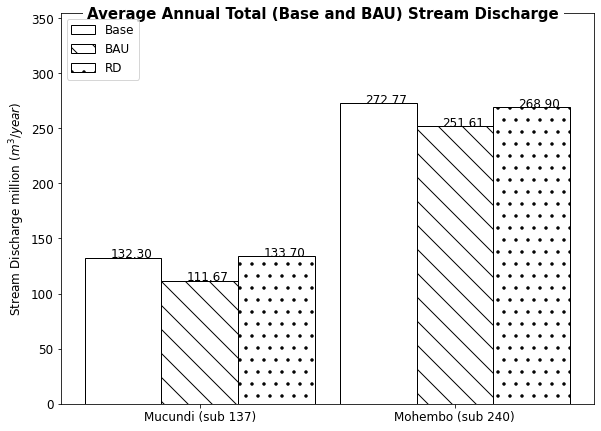

In [40]:
fig, ax = plt.subplots( 
                # sharex=True,
                figsize=(8,6)
                )

_X = np.arange(len(asbase.index))


ax.bar(_X-0.3, asbase, 0.3, label='Base', hatch='', color='white', edgecolor='black')
ax.bar(_X, asbau_df, 0.3, label='BAU', hatch='\\', color='white', edgecolor='black')
ax.bar(_X+0.3, asrd_df, 0.3, label='RD', hatch='.', color='white', edgecolor='black')

plt.xticks(_X, ['Mucundi (sub 137)', 'Mohembo (sub 240)']) # set labels manually
# x = date2num(df_base_as.index)
# w = 100
# ax.bar(x-50, df_base_as_.sub_240, width=w, align='center', label='Base')
# ax.bar(x+50, scn_df_as_.str_sim, width=w, align='center', label='BAU')
for index, value in zip(_X-0.35, asbase):
    ax.text(index, value+0.05, '{:1.2f}'.format(value), fontsize=12)
for index, value in zip(_X-0.05, asbau_df):
    ax.text(index, value+0.05, '{:1.2f}'.format(value), fontsize=12)
for index, value in zip(_X+0.25, asrd_df):
    ax.text(index, value+0.05, '{:1.2f}'.format(value), fontsize=12)
# ax.yaxis.set_major_formatter(FuncFormatter(y_fmt))
ax.tick_params(axis='both', labelsize=12)
# # plt.setp(ax.get_xticklabels(), rotation=70)
# ax.set_xticks(x[::1])
# ax.xaxis_date()
# # plt.xticks[1].set_visible(False)

ax.margins(y=0.3)
ax.set_title(
    # 'Average Annual Total (Base and BAU) Sediment Yield',
    'Average Annual Total (Base and BAU) Stream Discharge',
    fontsize=15,
    fontweight="bold",
    horizontalalignment='left',
    x=0.05,
    y=0.97,
    bbox=dict(
        facecolor='white',
        edgecolor='white'))
# ax.autoscale(tight=True)
# ax.text(-0.005, 1.01, '1e6', fontsize=8, transform=ax.transAxes)
plt.tight_layout()
ax.legend(fontsize=12, loc='upper left')
# ax.grid(axis='y')
ax.set_ylabel(r'Stream Discharge million $(m^3/year)$', fontsize = 12)
# ax.set_ylabel(r'Sediment Yield $(Kiloton/year)$', fontsize = 12)
# plt.savefig('aat_okvg_2.png', dpi=300, bbox_inches="tight")
plt.show()

In [46]:
os.getcwd()

'd:\\spark-brc_gits\\swatmf_git'

In [75]:
(272.77-268.9)/272.77 *100

1.4187777248231128

In [76]:
(272.77-268.9)


3.8700000000000045

In [12]:
os.getcwd()

'd:\\spark-brc_gits\\swatmf_git'

# Create Dataframe from output.sub

## 1. Base

In [74]:
colnum = 13
colnam = 'SYLDt/ha'
ylabel = "Sediment Yield (tons/ha)"


In [146]:
# Select subs
subs = [137, 240]

# Create data with parameter change
df_sub = pd.read_csv(
                    os.path.join(wd_base, "output.sub"),
                    delim_whitespace=True,
                    skiprows=9,
                    usecols=[1, 3, colnum],
                    names=["date", "filter", colnam],
                    index_col=0,
                    dtype={'filter': str})

df_adj = pd.DataFrame()
for i in subs:
    df = df_sub.loc[i]
    df = df[df["filter"].astype(str).map(len) < 13]

    df.index = pd.date_range('1/1/2003', periods=len(df[colnam]), freq="M")
    df.rename(columns = {colnam:'base_{}'.format(i)}, inplace = True)
    df_adj = pd.concat(
        [df_adj, df['base_{}'.format(i)]], axis=1,
        sort=False
        )
df_adj.index = pd.DatetimeIndex(df_adj.index).normalize()

In [147]:
df_adj

,base_137,base_240
2003-01-31,0.031,0.027
2003-02-28,0.554,0.029
2003-03-31,0.002,0.005
2003-04-30,0.005,0.005
2003-05-31,0.000,0.000
...,...,...
2019-08-31,0.000,0.000
2019-09-30,0.000,0.000
2019-10-31,0.000,0.000
2019-11-30,0.000,0.000


## 2. BAU

In [148]:
# Select subs
subs = [137, 240]

# Create data with parameter change
df_sub = pd.read_csv(
                    os.path.join(wd_scn, "output.sub"),
                    delim_whitespace=True,
                    skiprows=9,
                    usecols=[1, 3, colnum],
                    names=["date", "filter", colnam],
                    dtype = {'filter': str},
                    index_col=0)

df_scn = pd.DataFrame()
for i in subs:
    df = df_sub.loc[i]
    df = df[df["filter"].astype(str).map(len) < 13]
    df.index = pd.date_range('1/1/2003', periods=len(df[colnam]), freq="M")
    df.rename(columns = {colnam:'scn_{}'.format(i)}, inplace = True)
    df_scn = pd.concat(
        [df_scn, df['scn_{}'.format(i)]], axis=1,
        sort=False
        )
df_scn.index = pd.DatetimeIndex(df_scn.index).normalize()
scn_df = df_scn

In [149]:
df_scn = df_scn.groupby(df_scn.index.month).mean()
df_scn

,scn_137,scn_240
1,2.485882,0.077647
2,4.445059,0.109647
3,1.924471,0.156824
4,0.198588,0.011471
5,0.000000,0.000000
6,0.000000,0.000000
7,0.000000,0.000000
8,0.000000,0.000000
9,0.000000,0.000000
10,0.000000,0.000000


# 3. RD

In [151]:
# Select subs
subs = [137, 240]

# Create data with parameter change
df_sub = pd.read_csv(
                    os.path.join(wd_rd, "output.sub"),
                    delim_whitespace=True,
                    skiprows=9,
                    usecols=[1, 3, colnum],
                    names=["date", "filter", colnam],
                    dtype = {'filter': str},
                    index_col=0)

df_rd = pd.DataFrame()
for i in subs:
    df = df_sub.loc[i]
    df = df[df["filter"].astype(str).map(len) < 13]
    df.index = pd.date_range('1/1/2003', periods=len(df[colnam]), freq="M")
    df.rename(columns = {colnam:'rd_{}'.format(i)}, inplace = True)
    df_rd = pd.concat(
        [df_rd, df['rd_{}'.format(i)]], axis=1,
        sort=False
        )
df_rd.index = pd.DatetimeIndex(df_rd.index).normalize()
rd_df = df_rd

In [152]:
df_rd = df_rd.groupby(df_rd.index.month).mean()
df_rd

,rd_137,rd_240
1,1.514353,0.058765
2,2.787765,0.087588
3,1.125412,0.107412
4,0.103941,0.005882
5,0.000000,0.000000
6,0.000000,0.000000
7,0.000000,0.000000
8,0.000000,0.000000
9,0.000000,0.000000
10,0.000000,0.000000


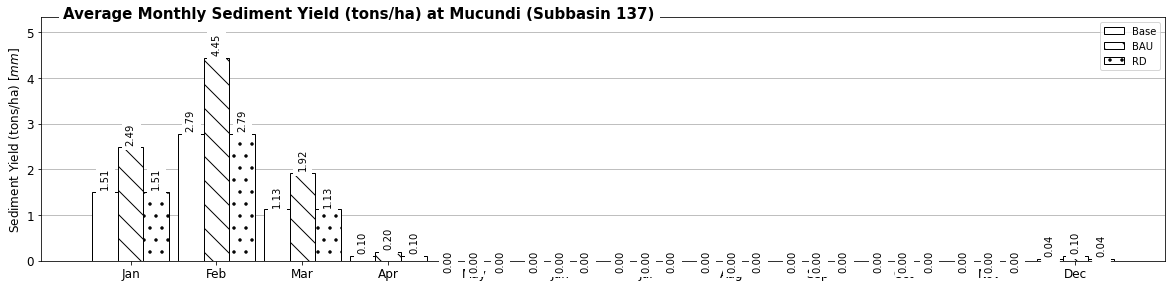

In [137]:
fig, ax = plt.subplots( 
                # sharex=True,
                figsize=(16,4)
                )
# x = date2num(base_df.index)
w = 0.3
ax.bar(base_df.index-0.3, base_df.base_137, width=w, align='center', label='Base', hatch='', color='white', edgecolor='black', zorder=3)
ax.bar(base_df.index, df_scn.scn_137, width=w, align='center', label='BAU', hatch='\\', color='white', edgecolor='black', zorder=3)
ax.bar(base_df.index+0.3, df_rd.rd_137, width=w, align='center', label='RD', hatch='.', color='white', edgecolor='black', zorder=3)

for index, value in zip(base_df.index-0.2, base_df.base_137):
    if value > 0:
        ax.text(
            index-0.1, value+0.05, '{:3.2f}'.format(value), fontsize=10,
            verticalalignment='bottom', rotation=90,
            backgroundcolor='white',
            horizontalalignment='center'
            )
    else:
        ax.text(
            index-0.1, value-0.25, '{:3.2f}'.format(value), fontsize=10,
            verticalalignment='bottom', rotation=90,
            backgroundcolor='white',
            horizontalalignment='center'
            )
for index, value in zip(base_df.index, df_scn.scn_137):
    if value > 0:
        ax.text(
            index, value+0.05, '{:3.2f}'.format(value), fontsize=10,
            verticalalignment='bottom', rotation=90,
            backgroundcolor='white',
            horizontalalignment='center'            
            )
    else:
        ax.text(
            index, value-0.25, '{:3.2f}'.format(value), fontsize=10,
            verticalalignment='bottom', rotation=90,
            backgroundcolor='white',
            horizontalalignment='center'                       
            )
for index, value in zip(base_df.index, df_rd.rd_137):
    if value > 0:
        ax.text(
            index+0.3, value+0.05, '{:3.2f}'.format(value), fontsize=10,
            verticalalignment='bottom', rotation=90,
            backgroundcolor='white', 
            horizontalalignment='center'           
            )
    else:
        ax.text(
            index+0.3, value-0.25, '{:3.2f}'.format(value), fontsize=10,
            verticalalignment='bottom', rotation=90,
            backgroundcolor='white',
            horizontalalignment='center'            
            )

ax.tick_params(axis='both', labelsize=12)
# plt.setp(ax.get_xticklabels(), rotation=70)
# ax.set_xticks(base_df.index[::1])
# ax.xaxis_date()
# plt.xticks[1].set_visible(False)
ax.set_xticks(base_df.index[::1])
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticklabels(month_names)
ax.margins(y=0.2)
ax.set_title(
    'Average Monthly {} at Mucundi (Subbasin 137)'.format(ylabel),
    fontsize=15,
    fontweight="bold",
    horizontalalignment='left',
    x=0.02,
    y=0.97,
    bbox=dict(
        facecolor='white',
        edgecolor='white'))
# ax.autoscale(tight=True)
plt.tight_layout()
ax.legend(fontsize=10)
ax.grid(axis='y', zorder=0)
ax.set_ylabel('{} $[mm]$'.format(ylabel), fontsize = 12)
plt.savefig('am_mucundi_{}.png'.format('dd'), dpi=300, bbox_inches="tight")
plt.show()

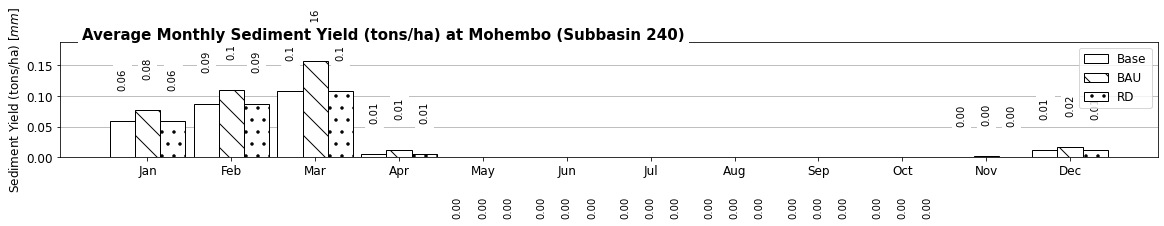

In [138]:
fig, ax = plt.subplots( 
                # sharex=True,
                figsize=(16,4)
                )
# x = date2num(base_df.index)
w = 0.3
ax.bar(base_df.index-0.3, base_df.base_240, width=w, align='center', label='Base', hatch='', color='white', edgecolor='black', zorder=3)
ax.bar(base_df.index, df_scn.scn_240, width=w, align='center', label='BAU', hatch='\\', color='white', edgecolor='black', zorder=3)
ax.bar(base_df.index+0.3, df_rd.rd_240, width=w, align='center', label='RD', hatch='.', color='white', edgecolor='black', zorder=3)


for index, value in zip(base_df.index-0.2, base_df.base_240):
    if value > 0:
        ax.text(
            index-0.1, value+0.05, '{:3.2f}'.format(value), fontsize=10,
            verticalalignment='bottom', rotation=90,
            backgroundcolor='white',
            horizontalalignment='center'
            )
    else:
        ax.text(
            index-0.1, value-0.1, '{:3.2f}'.format(value), fontsize=10,
            verticalalignment='bottom', rotation=90,
            backgroundcolor='white',
            horizontalalignment='center'
            )
for index, value in zip(base_df.index, df_scn.scn_240):
    if value > 0:
        ax.text(
            index, value+0.05, '{:3.2f}'.format(value), fontsize=10,
            verticalalignment='bottom', rotation=90,
            backgroundcolor='white',
            horizontalalignment='center'            
            )
    else:
        ax.text(
            index, value-0.1, '{:3.2f}'.format(value), fontsize=10,
            verticalalignment='bottom', rotation=90,
            backgroundcolor='white',
            horizontalalignment='center'                       
            )
for index, value in zip(base_df.index, df_rd.rd_240):
    if value > 0:
        ax.text(
            index+0.3, value+0.05, '{:3.2f}'.format(value), fontsize=10,
            verticalalignment='bottom', rotation=90,
            backgroundcolor='white', 
            horizontalalignment='center'           
            )
    else:
        ax.text(
            index+0.3, value-0.1, '{:3.2f}'.format(value), fontsize=10,
            verticalalignment='bottom', rotation=90,
            backgroundcolor='white',
            horizontalalignment='center'            
            )


ax.tick_params(axis='both', labelsize=12)
# plt.setp(ax.get_xticklabels(), rotation=70)
# ax.set_xticks(base_df.index[::1])
# ax.xaxis_date()
# plt.xticks[1].set_visible(False)
ax.set_xticks(base_df.index[::1])
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticklabels(month_names)


ax.margins(y=0.2)
ax.set_title(
    'Average Monthly {} at Mohembo (Subbasin 240)'.format(ylabel),
    fontsize=15,
    fontweight="bold",
    horizontalalignment='left',
    x=0.02,
    y=0.97,
    bbox=dict(
        facecolor='white',
        edgecolor='white'))
# ax.autoscale(tight=True)
plt.tight_layout()
ax.legend(fontsize=12)
ax.grid(axis='y', zorder=0)
ax.set_ylabel('{} $[mm]$'.format(ylabel), fontsize = 12)
plt.savefig('am_mohembo_{}.png'.format('dd'), dpi=300, bbox_inches="tight")
plt.show()

# Annual Total sedi

In [139]:
df_adj

,base_137,base_240
2003-01-31,0.031,0.027
2003-02-28,0.554,0.029
2003-03-31,0.002,0.005
2003-04-30,0.005,0.005
2003-05-31,0.000,0.000
...,...,...
2019-08-31,0.000,0.000
2019-09-30,0.000,0.000
2019-10-31,0.000,0.000
2019-11-30,0.000,0.000


In [154]:
asbase_sub = df_adj.resample('A').sum().mean()
asbase_sub

base_137    5.571235
base_240    0.272353
dtype: float64

In [155]:
asbau_sub = scn_df.resample('A').sum().mean()
asbau_sub

scn_137    9.156824
scn_240    0.374059
dtype: float64

In [156]:
asrd_sub = rd_df.resample('A').sum().mean()
asrd_sub



rd_137    5.571235
rd_240    0.272353
dtype: float64

In [17]:
fig, ax = plt.subplots( 
                # sharex=True,
                figsize=(10,4)
                )

_X = np.arange(len(asbase_sub.index))


ax.bar(_X-0.3, asbase_sub, 0.3, label='Base', hatch='', color='white', edgecolor='black')
ax.bar(_X, asbau_sub, 0.3, label='BAU', hatch='\\', color='white', edgecolor='black')
ax.bar(_X+0.3, asrd_sub, 0.3, label='RD', hatch='.', color='white', edgecolor='black')

plt.xticks(_X, ['Mucundi (sub 137)', 'Mohembo (sub 240)']) # set labels manually
# x = date2num(df_base_as.index)
# w = 100
# ax.bar(x-50, df_base_as_.sub_240, width=w, align='center', label='Base')
# ax.bar(x+50, scn_df_as_.str_sim, width=w, align='center', label='BAU')
for index, value in zip(_X-0.35, asbase_sub):
    ax.text(index, value+0.05, '{:1.2f}'.format(value), fontsize=12)
for index, value in zip(_X-0.05, asbau_sub):
    ax.text(index, value+0.05, '{:1.2f}'.format(value), fontsize=12)
for index, value in zip(_X+0.25, asrd_sub):
    ax.text(index, value+0.05, '{:1.2f}'.format(value), fontsize=12)
# ax.yaxis.set_major_formatter(FuncFormatter(y_fmt))
ax.tick_params(axis='both', labelsize=12)
# # plt.setp(ax.get_xticklabels(), rotation=70)
# ax.set_xticks(x[::1])
# ax.xaxis_date()
# # plt.xticks[1].set_visible(False)

ax.margins(y=0.3)
ax.set_title(
    'Average Annual Total (Base and BAU) Sediment Yield',
    fontsize=15,
    fontweight="bold",
    horizontalalignment='left',
    x=0.05,
    y=0.97,
    bbox=dict(
        facecolor='white',
        edgecolor='white'))
# ax.autoscale(tight=True)
# ax.text(-0.005, 1.01, '1e6', fontsize=8, transform=ax.transAxes)
plt.tight_layout()
ax.legend(fontsize=12)
# ax.grid(axis='y')
ax.set_ylabel(r'Sediment Yield (million $ton/year$)', fontsize = 12)
# plt.savefig('aat_okvg_sub.png', dpi=300, bbox_inches="tight")
plt.show()

NameError: name 'asbase_sub' is not defined

# Waterbalance Pie

In [47]:
bau = pd.read_csv(
                    os.path.join(wd_scn, "output.sub"),
                    delim_whitespace=True,
                    skiprows=9,
                    usecols=[1, 3, 4, 6, 7, 8, 9, 10, 11], # streamflow
                    names=["date", "filter", "precip", "pet", "et", "sw", "perco", "surq", "gwq"],
                    index_col=0)
bau_63 = bau.loc[63]
bau_63 = bau_63[bau_63["filter"].astype(str).map(len) < 13]

bau_63.index = pd.date_range('1/1/2003', periods=len(bau_63), freq="M")
bau_63.index = pd.DatetimeIndex(bau_63.index).normalize()
bau_63

C:\Users\seonggyu.park\Miniconda3\envs\sm_pest\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,filter,precip,pet,et,sw,perco,surq,gwq
2003-01-31,1171.94,265.707,95.443,76.114,152.867,178.703,0.977,0.012
2003-02-28,2171.94,156.740,63.196,53.975,154.694,99.787,0.028,0.015
2003-03-31,3171.94,125.692,108.958,86.911,151.929,40.910,0.026,0.007
2003-04-30,4171.94,135.708,115.611,67.233,133.729,80.029,5.737,0.006
2003-05-31,5171.94,0.000,181.755,45.847,93.335,0.000,0.000,0.002
...,...,...,...,...,...,...,...,...
2020-05-31,8.17194E+03,0.000,200.278,31.758,51.945,0.000,0.000,0.000
2020-06-30,9.17194E+03,4.106,221.499,7.657,51.158,0.000,0.000,0.000
2020-07-31,10.17194E+03,49.676,133.812,33.669,70.611,0.000,0.005,0.000
2020-08-31,11.17194E+03,96.147,109.472,63.707,98.468,4.269,0.013,0.001


In [3]:
from swatmf_pkgs import swatmf_viz

In [4]:
bau_df = swatmf_viz.read_output_sub(wd_scn)
bau_63 = bau_df.loc[bau_df['subs'] == 63]
bau_63 = bau_63[bau_63["mons"] < 13]
bau_63.index = pd.date_range('1/1/2003', periods=len(bau_63.gwq), freq="M")
abau_63 = bau_63.resample('A').sum().mean()
# abau_63


In [5]:
rd_df = swatmf_viz.read_output_sub(wd_rd)
rd_63 = rd_df.loc[rd_df['subs'] == 63]
rd_63 = rd_63[rd_63["mons"] < 13]
rd_63.index = pd.date_range('1/1/2003', periods=len(rd_63.gwq), freq="M")
ard_63 = rd_63.resample('A').sum().mean()

In [6]:
base_df = swatmf_viz.read_output_sub(wd_base)
base_63 = base_df.loc[base_df['subs'] == 63]
base_63 = base_63[base_63["mons"] < 13]
base_63.index = pd.date_range('1/1/2003', periods=len(base_63.gwq), freq="M")
abase_63 = base_63.resample('A').sum().mean()


In [7]:
ard_63

subs       756.000000
mons        78.000000
precip     996.465529
pet       1649.172176
et         532.644294
sw        1030.717824
perco      451.604824
surq        11.649647
gwq          0.050647
dtype: float64

In [8]:
abau_63

subs       756.000000
mons        78.000000
precip     996.465529
pet       1645.435118
et         595.666471
sw        1226.584118
perco      475.016000
surq         2.276824
gwq          0.053529
dtype: float64

In [37]:
abau_63.index[3:-1]

Index(['pet', 'et', 'sw', 'perco', 'surq'], dtype='object')

In [15]:
explode = (0, 0, 0, 0.5, 0.3)

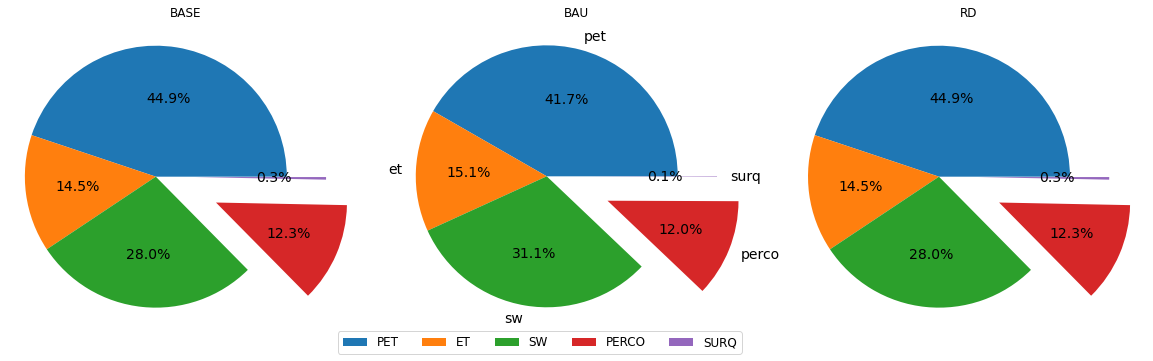

In [17]:
fig, axes = plt.subplots(1,3, figsize=(16,5))
ax1 = fig.add_subplot(111, frameon=False)
ax1.axis('off')
axes[0].pie(
    abase_63[3:-1], explode=explode,
    labels=abase_63.name,
    autopct='%1.1f%%',
    shadow=False, startangle=0, textprops={'fontsize': 14, 'color': 'k'}, )
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# axes[0].legend()
axes[1].pie(
    abau_63[3:-1], explode=explode,
    labels=abau_63.index[3:-1],
    autopct='%1.1f%%',
    shadow=False, startangle=0, textprops={'fontsize': 14, 'color': 'k'}, )
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# axes[0].legend()

axes[2].pie(
    ard_63[3:-1], explode=explode,
    labels=ard_63[3:-1].name,
    autopct='%1.1f%%',
    shadow=False, startangle=0, textprops={'fontsize': 14, 'color': 'k'}, )
axes[2].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# axes[1].legend()
lines, labels = fig.axes[1].get_legend_handles_labels()

labels = ['PET', 'ET', 'SW', 'PERCO', 'SURQ']
ax1.legend(
    lines, labels,
    # loc = 'lower center',
    ncol=5,
    bbox_to_anchor=(0.65, 0.01),
    fontsize=12)

titles = ['BASE', 'BAU', 'RD']
for ax, t in zip(axes, titles):
    ax.set_title(t, fontsize=12)

fig.tight_layout()
plt.show()

In [36]:
df =  rd_63.loc[:, 'et'] - bau_63.loc[:, 'et']
df_p = df.loc[df>0]
df_p

2003-04-30     2.488
2003-05-31    14.832
2003-06-30     5.409
2003-11-30     1.796
2003-12-31     1.442
               ...  
2019-05-31    17.063
2019-06-30     6.471
2019-09-30    24.203
2019-10-31     4.398
2019-12-31     0.162
Name: et, Length: 84, dtype: float64

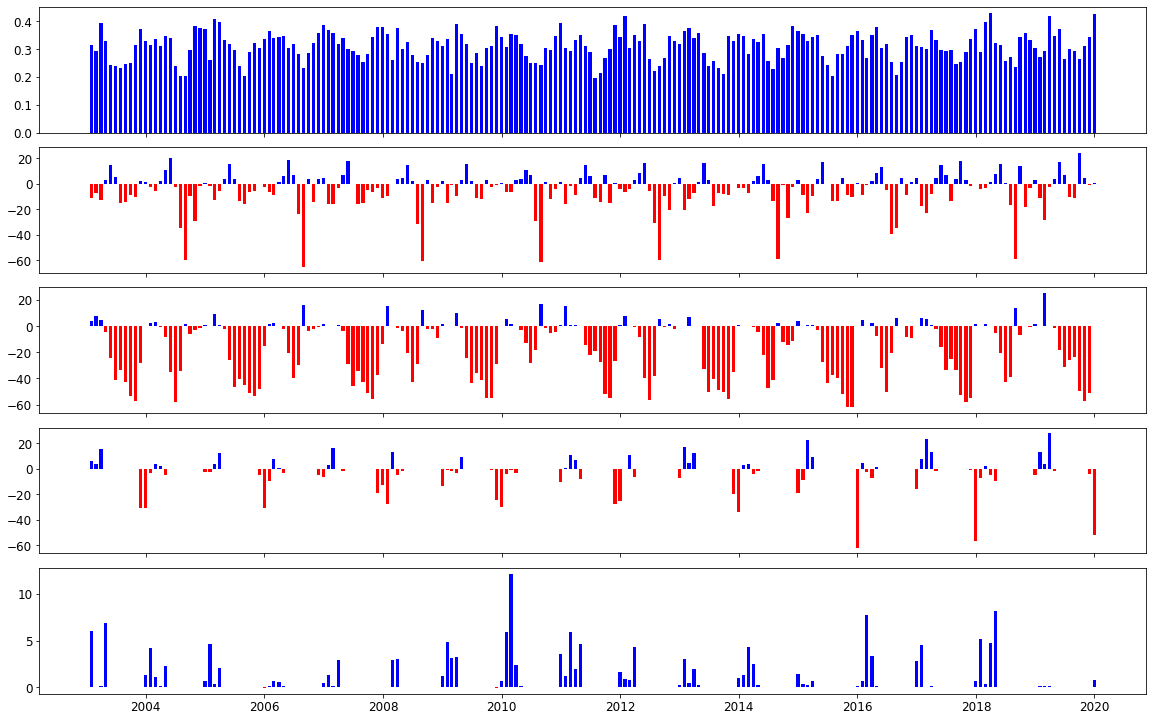

In [47]:
fig, axes = plt.subplots(5,1, figsize=(16,10), sharex=True)
for i, ax in zip(bau_63.columns[3:-1], axes.flat):
    df = rd_63.loc[:, i] - bau_63.loc[:, i]
    df_p = df.loc[df>0]
    df_n = df.loc[df<=0]
    ax.bar(df_p.index, df_p, color='b', width=20)
    ax.bar(df_n.index, df_n, color='r', width=20)

    # ax.plot(bau_63.index, base_63.loc[:, i])
    # ax.plot(bau_63.index, bau_63.loc[:, i])
    # ax.plot(bau_63.index, rd_63.loc[:, i])
    ax.tick_params(axis='both', labelsize=12)
fig.tight_layout()
plt.show()

In [19]:
bau_63.columns[3:-1]

Index(['pet', 'et', 'sw', 'perco', 'surq'], dtype='object')